In [1]:
from audio_utils import AudioUtil, SoundDS
from IPython.display import Audio

import torch
from torch.utils.data import DataLoader, Dataset

from torchaudio import transforms

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cd '/Users/thomasgaehtgens/Desktop/audio_autoencoder'

/Users/thomasgaehtgens/Desktop/audio_autoencoder


In [3]:
path_do_data_dir = 'DATA/'

# Get the list of files in the 'Piano Loops' directory using os.listdir()
piano_file_list = [path_do_data_dir + 'Piano Loops/' + filename for filename in os.listdir(path_do_data_dir + 'Piano Loops')]

# Create a pandas DataFrame with the "path_to_data" and "Instrument" columns for "Piano" entries
df = pd.DataFrame({"path_to_data": piano_file_list, "Instrument": "Piano"})

# Get the list of files in the 'Guitar Loops' directory using os.listdir()
guitar_file_list = [path_do_data_dir + 'Guitar Loops/' + filename for filename in os.listdir(path_do_data_dir + 'Guitar Loops')]

# Create a DataFrame with the "path_to_data" and "Instrument" columns for "Guitar" entries
guitar_df = pd.DataFrame({"path_to_data": guitar_file_list, "Instrument": "Guitar"})

# Concatenate the "Piano" and "Guitar" DataFrames
df = pd.concat([df, guitar_df], ignore_index=True)

In [4]:
df

,path_to_data,Instrument
0,DATA/Piano Loops/Piano Loop 35 - 128 BPM A# Mi...,Piano
1,DATA/Piano Loops/Piano Loop 75 - 150 BPM G# Mi...,Piano
2,DATA/Piano Loops/Piano Loop 84 - 160 BPM F Min...,Piano
3,DATA/Piano Loops/Piano Loop 79 - 160 BPM D Min...,Piano
4,DATA/Piano Loops/Piano Loop 38 - 140 BPM C Maj...,Piano
...,...,...
195,DATA/Guitar Loops/Guitar Loop 92 - 174 BPM E M...,Guitar
196,DATA/Guitar Loops/Guitar Loop 93 - 174 BPM E M...,Guitar
197,DATA/Guitar Loops/Guitar Loop 3 - 100 BPM D Ma...,Guitar
198,DATA/Guitar Loops/Guitar Loop 83 - 160 BPM G M...,Guitar


In [5]:
myds = SoundDS(df)

# Create data loaders
dl = torch.utils.data.DataLoader(myds, batch_size=1, shuffle=False)

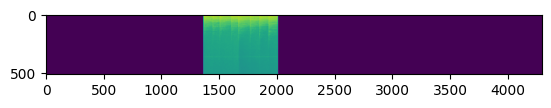

In [6]:
for data in dl:
    plt.imshow(transforms.AmplitudeToDB()(data[0][0]).numpy()) #Há um problema qualquer quando truncamos em vez de padding.........
    break
    
spec = data[0][0]

In [7]:
data.shape

torch.Size([1, 1, 513, 4297])

In [8]:
spec.numpy()[:, 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [9]:
# Step 1: Check if any element in each column is non-zero
non_zero_cols_mask = torch.any(spec != 0, dim=0)

# Step 2: Use boolean indexing to select columns with at least one non-zero element
spec = spec[:, non_zero_cols_mask]

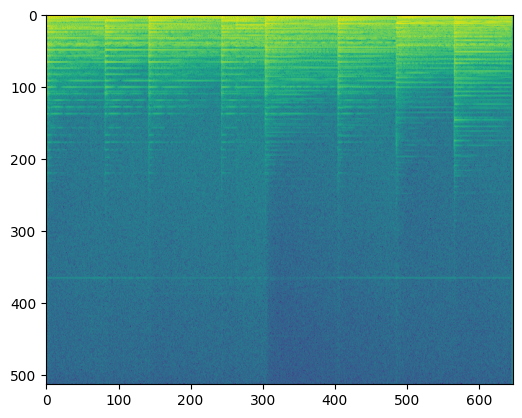

In [10]:
plt.imshow(transforms.AmplitudeToDB()(spec).numpy())

In [11]:
n_fft=int(1024)
hop_len=int(512)

sample_rate = 44100

rec_waveform = AudioUtil.recover_waveform(spec, n_fft=n_fft, hop_len=hop_len)

In [12]:
Audio(rec_waveform.numpy(), rate=sample_rate)